/home/bo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log10


(min - max): 0.0 - 3.626431601151047


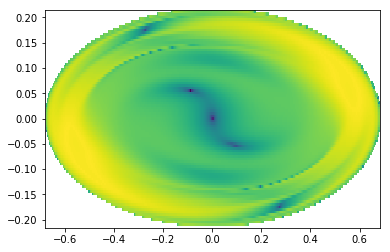

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import magphyxp

def f(x,y):
    pr = 2*energy + 2/3 - x**2 - 10*y**2
    if pr >= 0:
        return magphyxp.period(x, y, num_bounces, energy)
    return np.nan

vf = np.vectorize(f)

energy = -0.1
num_bounces = 4
p_theta = np.sqrt((energy + 1/3)*2)
p_phi = np.sqrt((energy + 1/3)/5)

full = True

if full:
    p_theta_start = -p_theta
    p_theta_end = p_theta
    p_phi_start = -p_phi
    p_phi_end = p_phi
    h = 0.005
else:
    p_theta_start = -0.095
    p_theta_end = -0.085
    p_phi_start = 0.053
    p_phi_end = 0.055
    h = 0.0001
#     p_theta_start = -0.050
#     p_theta_end = 0.01
#     p_phi_start = 0.030
#     p_phi_end = 0.034
#     h = 0.0001

x_range = np.arange(p_theta_start, p_theta_end, h)
y_range = np.arange(p_phi_start, p_phi_end, h)

x, y = np.meshgrid(x_range, y_range)

# %time z = vf(x,y)
z = vf(x,y)

vz = np.log10((z-np.nanmin(z))/(np.nanmax(z)-np.nanmin(z)))
h = plt.pcolor(x,y,vz)

print('(min - max): {} - {}'.format(np.nanmin(z), np.nanmax(z)))

# iPyWidgets

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import magphyxp
from ipywidgets import interactive, interact, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

def f(x,y,energy,num_bounces):
    pr = 2*energy + 2/3 - x**2 - 10*y**2
    if pr >= 0:
        return magphyxp.period(x, y, num_bounces, energy)
    return np.nan

vf = np.vectorize(f)

energy_widget = widgets.FloatSlider(min=-1/3, max=0, step=0.05, value=-1/4, description='Energy:')
num_bounces_widget = widgets.IntSlider(min=1, max=5, value=3, description='Num bounces:')
h_widget = widgets.FloatSlider(min=0.001, max=0.1, step=0.0005, value=0.01, readout_format='.3f', description='H:')
p_theta_widget = widgets.FloatSlider(min=0, max=0.8, step=0.001, value=0.3)
p_phi_widget = widgets.FloatSlider(min=0, max=0.8, step=0.001, value=0.3)

# def update_p_theta_range(*args):
#     p_theta_widget.max = np.sqrt((energy_widget.value + 1/3)*2)
# energy_widget.observe(update_p_theta_range, 'value')

# def update_p_phi_range(*args):
#     p_phi_widget.max = np.sqrt((energy_widget.value + 1/3)/5)
# energy_widget.observe(update_p_phi_range, 'value')

def func(energy, num_bounces, h, p_theta, p_phi):
#     p_theta = np.sqrt((energy + 1/3)*2)
#     p_phi = np.sqrt((energy + 1/3)/5)
#     x_range = np.arange(-p_theta, p_theta, h)
#     y_range = np.arange(-p_phi, p_phi, h)
    x_range = np.arange(-p_theta, p_theta, h)
    y_range = np.arange(-p_phi, p_phi, h)
    x, y = np.meshgrid(x_range, y_range)
    z = vf(x,y,energy,num_bounces)
#     z = f(x,y,energy,num_bounces)
    plt.pcolor(x,y,z)
    plt.colorbar()

w = interactive(func, energy=energy_widget, num_bounces=num_bounces_widget, h=h_widget, p_theta=p_theta_widget, p_phi=p_phi_widget)
display(w)

interactive(children=(FloatSlider(value=-0.25, description='Energy:', max=0.0, min=-0.3333333333333333, step=0…

# Find all local minima

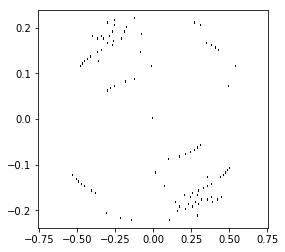

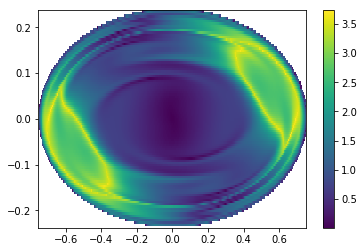

(min - max): 0.006503982684280844 - 3.7317585062174214
pr: 0.353133853244297
ptheta: 0.29722734729091993
pphi: -0.1880476142847616
fval: 0.031208865726172673

pr: 0.4844125444626916
ptheta: 0.2572273472909199
pphi: -0.16304761428476158
fval: 0.020155067174353565

pr: 0.47805029743534494
ptheta: 0.29722734729091993
pphi: -0.15804761428476158
fval: 0.10448858590276011

pr: 0.6918760093543834
ptheta: 0.10222734729091976
pphi: -0.08804761428476152
fval: 0.024829419623546168

pr: 0.7527422274350036
ptheta: -0.0027726527090803366
pphi: 0.0019523857152385637
fval: 0.006503982684280844

pr: 0.689917653490419
ptheta: -0.12277265270908044
pphi: 0.08695238571523864
fval: 0.018454395321995505

pr: 0.4823678272223742
ptheta: -0.26777265270908057
pphi: 0.1619523857152387
fval: 0.018206463141564527

pr: 0.35423642132335736
ptheta: -0.3027726527090806
pphi: 0.18695238571523873
fval: 0.044448238413123134



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import magphyxp

def f(x,y):
    pr = 2*energy + 2/3 - x**2 - 10*y**2
    if pr >= 0:
        return magphyxp.period(x, y, num_bounces, energy)
    return np.nan

vf = np.vectorize(f)

energy = -0.05
num_bounces = 3
p_theta = np.sqrt((energy + 1/3)*2)
p_phi = np.sqrt((energy + 1/3)/5)

full = True

if full:
    p_theta_start = -p_theta
    p_theta_end = p_theta
    p_phi_start = -p_phi
    p_phi_end = p_phi
    h = 0.005
else:
    p_theta_start = 0.257
    p_theta_end = 0.337
    p_phi_start = -0.218
    p_phi_end = -0.158
    h = 0.0001

x_range = np.arange(p_theta_start, p_theta_end, h)
y_range = np.arange(p_phi_start, p_phi_end, h)

x, y = np.meshgrid(x_range, y_range)

# %time z = vf(x,y)
z = vf(x,y)

grid_image = np.ones((z.shape[0], z.shape[1], 3))
minima = []
for i in np.arange(x.shape[0]):
    for j in np.arange(x.shape[1]):
        try:
            top_left = z[i - 1, j - 1]
        except IndexError:
            top_left = 100
        try:
            top = z[i - 1, j]
        except IndexError:
            top = 100
        try:
            top_right = z[i - 1, j + 1]
        except IndexError:
            top_right = 100
        try:
            left = z[i, j - 1]
        except IndexError:
            left = 100
        try:
            right = z[i, j + 1]
        except IndexError:
            right = 100
        try:
            bottom_left = z[i + 1, j - 1]
        except IndexError:
            bottom_left = 100
        try:
            bottom = z[i + 1, j]
        except IndexError:
            bottom = 100
        try:
            bottom_right = z[i + 1, j + 1]
        except IndexError:
            bottom_right = 100
        
        if (z[i, j] < top_left) \
            and (z[i, j] < top) \
            and (z[i, j] < top_right) \
            and (z[i, j] < left) \
            and (z[i, j] < right) \
            and (z[i, j] < bottom_left) \
            and (z[i, j] < bottom) \
            and (z[i, j] < bottom_right):
            grid_image[i, j, :] = [0, 0, 0]
            minima.append((x[i,j], y[i,j], z[i,j]))
            
h1 = plt.imshow(grid_image, aspect=3, extent=(p_theta_start, p_theta_end, p_phi_start, p_phi_end), origin='lower')
plt.show()
h2 = plt.pcolor(x,y,z)
plt.colorbar()
plt.show()

print('(min - max): {} - {}'.format(np.nanmin(z), np.nanmax(z)))

for row in minima:
    if abs(row[2] - np.nanmin(z)) < 0.1:
        print('pr:', np.sqrt(2*energy + 2/3 - row[0]**2 - 10*row[1]**2))
        print('ptheta:', row[0])
        print('pphi:', row[1])
        print('fval:', row[2])
        print()

# Identify minima of interest

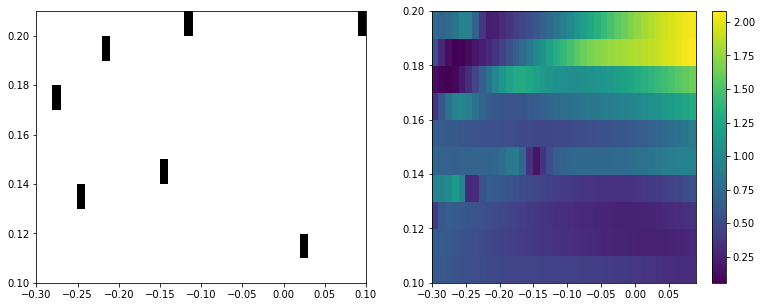

(min - max): 0.056560604016527155 - 2.121625295051201
Point [ 0. -0.] not in grid


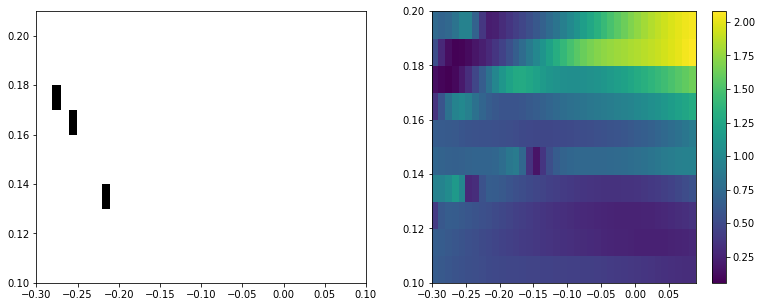

Minima after running MagPhyxP:
Before: [-0.28       0.17       0.0565606] After: [-2.73740860e-01  1.74974168e-01  7.20390416e-16]
Before: [-0.25        0.13        0.28397908] After: [-2.73740858e-01  1.74974168e-01  7.80795437e-16]
Before: [-0.22        0.19        0.22052231] After: [-2.73740852e-01  1.74974166e-01  5.80778712e-16]
Before: [-0.15        0.14        0.16052699] After: [-0.24532435  0.16059037  0.00064397]
Before: [-0.12        0.2         0.48141362] After: [-2.10689124e-01  1.34463776e-01  1.22783148e-15]
Before: [0.02       0.11       0.23900749] After: [-2.10689113e-01  1.34463772e-01  2.68897089e-15]
Before: [0.09       0.2        1.23315575] After: [ 5.83237402e-08 -4.30574664e-08  3.58150331e-16]

Unique minima:
[[-0.2737  0.175   0.    ]
 [-0.2453  0.1606  0.0006]
 [-0.2107  0.1345  0.    ]
 [ 0.     -0.      0.    ]]


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import magphyxp
from scipy import spatial

def find_indices(point, xrange, yrange, res):
    ptheta = point[0]
    pphi = point[1]
    
    i, j = 0, 0
    for x in xrange:
        if abs(ptheta - x) < res:
            break
        j += 1
        
    for y in yrange:
        if abs(pphi - y) < res:
            break
        i += 1
        
    return i, j

def f(x,y):
    pr = 2*energy + 2/3 - x**2 - 10*y**2
    if pr >= 0:
        return magphyxp.period(x, y, num_bounces, energy)
    return np.nan

vf = np.vectorize(f)

energy = -0.1
num_bounces = 4
p_theta = np.sqrt((energy + 1/3)*2)
p_phi = np.sqrt((energy + 1/3)/5)

full = False

if full:
    p_theta_start = -p_theta
    p_theta_end = p_theta
    p_phi_start = -p_phi
    p_phi_end = p_phi
    h = 0.005
else:
    p_theta_start = -0.3
    p_theta_end = 0.1
    p_phi_start = 0.10
    p_phi_end = 0.21
    h = 0.01

x_range = np.arange(p_theta_start, p_theta_end, h)
y_range = np.arange(p_phi_start, p_phi_end, h)

x, y = np.meshgrid(x_range, y_range)

# %time z = vf(x,y)
z = vf(x,y)

grid_image = np.ones((z.shape[0], z.shape[1], 3))
minima = []
for i in np.arange(x.shape[0]):
    for j in np.arange(x.shape[1]):
        try:
            top_left = z[i - 1, j - 1]
        except IndexError:
            top_left = 100
        try:
            top = z[i - 1, j]
        except IndexError:
            top = 100
        try:
            top_right = z[i - 1, j + 1]
        except IndexError:
            top_right = 100
        try:
            left = z[i, j - 1]
        except IndexError:
            left = 100
        try:
            right = z[i, j + 1]
        except IndexError:
            right = 100
        try:
            bottom_left = z[i + 1, j - 1]
        except IndexError:
            bottom_left = 100
        try:
            bottom = z[i + 1, j]
        except IndexError:
            bottom = 100
        try:
            bottom_right = z[i + 1, j + 1]
        except IndexError:
            bottom_right = 100
        
        if (z[i, j] < top_left) \
            and (z[i, j] < top) \
            and (z[i, j] < top_right) \
            and (z[i, j] < left) \
            and (z[i, j] < right) \
            and (z[i, j] < bottom_left) \
            and (z[i, j] < bottom) \
            and (z[i, j] < bottom_right):
            grid_image[i, j, :] = [0, 0, 0]
            minima.append((x[i,j], y[i,j], z[i,j], i, j))
            
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(13)
ax1.imshow(grid_image, aspect=3, extent=(p_theta_start, p_theta_end, p_phi_start, p_phi_end), origin='lower')
pos = ax2.pcolor(x,y,z)
fig.colorbar(pos,ax=ax2)
plt.show()
print('(min - max): {} - {}'.format(np.nanmin(z), np.nanmax(z)))
list.sort(minima)
# for row in minima:
#     print('ptheta:', row[0], 'pphi:', row[1], 'fval:', row[2])

real_minima = []
minima_array = np.array(minima)
minima_array = minima_array[:, 0:2]
# print(minima)
grid_image1 = np.ones((z.shape[0], z.shape[1], 3))
for row in minima_array:
    m = magphyxp.calculate_min(row[0], row[1], num_bounces, energy, 0.00001)
    if m.f < .001:
        real_minima.append(m)
        pt = np.array((m.ptheta, m.pphi))
        pt = np.around(pt, decimals=-int(np.log10(h)))
        i,j = find_indices(pt,x_range,y_range,h)
        try:
            grid_image1[i,j,:] = [0,0,0]
        except IndexError:
            print('Point', pt, 'not in grid')

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(13)
ax1.imshow(grid_image1, aspect=3, extent=(p_theta_start, p_theta_end, p_phi_start, p_phi_end), origin='lower')
pos = ax2.pcolor(x,y,z)
fig.colorbar(pos,ax=ax2)
plt.show()
list.sort(real_minima, key=lambda m: m.ptheta)
minima = np.array(minima)
print('Minima after running MagPhyxP:')
for row1, row2 in zip(minima,real_minima):
#     print('ptheta:', row.ptheta, 'pphi:', row.pphi, 'fval:', row.f)
    print('Before:', row1[:3], 'After:', np.array((row2.ptheta,row2.pphi,row2.f)))
print()
# find unique points
unique = []
for item in real_minima:
    row = np.array([np.sqrt(2*energy + 2/3 - item.ptheta**2 - 10*item.pphi**2),item.ptheta, item.pphi, item.f])
#     print(row)
    unique.append(row)

a = np.around(unique, decimals=4)
b = np.unique(a, axis=0)
print('Unique minima:')
print(b[:, 1:])
# print('Length:', len(b))

# print('\n'.join('{} {} {}'.format(m.ptheta, m.pphi, m.f) for m in real_minima))
# print('\n'.join('{:0.4} {:0.4} {:0.4}'.format(row[0], row[1], row[2]) for row in b))

# filter for only the periodic solutions
periodic = []
# for i in np.arange(len(b) - 1):
#     next = i + 1
#     if b[next, 0] == b[i, 0]:
#         periodic.append(b[i,:])
#         periodic.append(b[next,:])
        
# periodic = np.array(periodic)
# print(periodic)

# fig3, ax4 = plt.subplots()
# ax4.scatter(periodic[:,1],periodic[:,2])
# ax4.scatter(unique[:,1],unique[:,2])
# ax4.set_aspect(3)
# ax4.set_xlim(-p_theta, p_theta)
# ax4.set_ylim(-p_phi, p_phi)
# plt.show()


In [17]:
a = [1, 2, 3]
print('\n'.join('{}'.format(x) for x in a))

1
2
3


In [4]:
import magphyxp
print(magphyxp.period(-0.08959999, 0.0543, 4, -0.1))
m = magphyxp.calculate_min(-0.08959999, 0.0543, 4, -0.1)
print(m.ptheta)
print(m.pphi)
print(m.f)


0.00019767433095451404
-0.08957599612069209
0.054283680649233446
2.919417320794933e-18
